# Модуль 17. Практическая работа

## Цели работы

1. Познакомиться с фреймворком PyTorch, закрепить навыки из видео.
1. Обучить простую полносвязную нейронную сеть, которая решает задачу регрессии.

## Что нужно сделать

1. Загрузите датасет `california_housing` из пакета `sklearn.datasets`.
1. Разделите датасет на тренировочную и тестовую выборки. 
1. Реализуйте абстракцию доступа к тренировочным данным на основе `torch.utils.data.Dataset` и `torch.utils.data.DataLoader`. 
1. Соберите нейронную сеть из слоёв пакета torch.nn.
1. Создайте экзепляры классов для функции потерь (`torch.nn.MSELoss`) и оптимизатора (`torch.optim.Adam`).
1. Реализуйте тренировочный цикл.
1. Вычислите значение функции потерь на тестовой выборке после каждой каждой эпохи и сохраните его в Python-список.
1. После завершения тренировочного цикла нарисуйте график зависимости функции потерь на тестовой выборке от количества эпох обучения.

## Что оценивается

Это задание с самопроверкой, сдавать его не нужно. Просто сверьтесь с решением в конце ноутбука.

## Информация о задаче

### Описание датасета 

Набор данных, описывающий среднюю стоимость дома в округах Калифорнии. Целевая переменная — медианная стоимость дома в 100 000 долларов США в 1990 году, независимые переменные – характеристики дома:

1. MedInc: медианный доход жильцов домов в квартале.
1. HouseAge: средний возраст дома в квартале.
1. AveRooms: среднее количество комнат.
1. AveBedrms: среднее количество спален. 
1. Population: число жильцов в квартале.
1. AveOccup: среднее число жильцов в квартире.
1. Latitude: широта центра квартала.
1. Longitude: долгота центра квартала.

Данные в датасете имеют разный масштаб. Например, обычно количество комнат в доме невелико, а население в расчёте на группу домов (квартал) — велико. Более того, большинство признаков должны быть положительными, а долгота — отрицательной (потому что речь идёт о Калифорнии). 

### Порядок выполнения задания

1. Ниже приведены семь ячеек с кодом, в котором есть недостающие фрагменты. 
1. Такие фрагменты выделены комментарием `# ВАШ КОД ЗДЕСЬ`. Ориентируйтесь на комментарии в коде. Они поясняют задания, где это необходимо. 
1. Заполните недостаюшие фрагменты так, чтобы семь ячеек, запущенные по порядку, приводили к обучению нейронной сети, которая решает задачу регрессии и предсказывает стоимость дома в Калифорнии по восьми характеристикам. Качество обучения контролируйте с помощью графика функции потерь на тестовой выборке, которая рассчитывается в конце каждой тренировочной эпохи. Если всё сделаете правильно, получится убывающий тренд: ошибка должна падать с ростом числа эпох. 

Опционально:

1. Экспериментируйте. Меняйте гиперпараметры модели: архитектуру сети, размер батча, число эпох и learning rate. Если интересно, можете поменять оптимизатор. По-умолчанию используем [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (вариация градиентного спуска, которая адаптивно подстраивает learning rate) – в этой задаче этот численный алгоритм хорошо работает и быстро сходится. Замените его на классический стохастический градиентный спуск [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html), сходимость почти наверняка упадёт. Меняйте всё что хотите, наблюдайте, как это сказывается на качестве обучения. Так нарабатывается профессиональная интуиция и опыт.  
1. Подумайте, как улучшить модель. Например, в описании датасета неспроста указано, что данные в нём разного масштаба. Попробуйте привести их к одному масштабу, проверьте сходимость обучения. Это должно сработать.   




In [1]:
import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [2]:
d = fetch_california_housing()
X, y = d.data, d.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    shuffle=True,
)

In [3]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.X.shape[0]

In [4]:
train_dataset = MyDataset(X_train, y_train)

X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [5]:
batch_size = 128

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [6]:
class RegressionNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 24)
        self.f1 = nn.ReLU()
        self.hidden2 = nn.Linear(24, 12)
        self.f2 = nn.ReLU()
        self.hidden3 = nn.Linear(12, 6)
        self.f3 = nn.ReLU()
        self.output = nn.Linear(6, 1)

    def forward(self, x):
        x = self.f1(self.hidden1(x))
        x = self.f2(self.hidden2(x))
        x = self.f3(self.hidden3(x))
        return self.output(x)

In [7]:
model = RegressionNet()

model

RegressionNet(
  (hidden1): Linear(in_features=8, out_features=24, bias=True)
  (f1): ReLU()
  (hidden2): Linear(in_features=24, out_features=12, bias=True)
  (f2): ReLU()
  (hidden3): Linear(in_features=12, out_features=6, bias=True)
  (f3): ReLU()
  (output): Linear(in_features=6, out_features=1, bias=True)
)

In [8]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100

loss_train = []
loss_test = []

for i in range(num_epochs):
    for X, y in train_dataloader:

        pred = model(X)

        loss = loss_fn(pred, y.unsqueeze(-1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    with torch.no_grad():
        loss = loss_fn(model(X_test_tensor), y_test_tensor.unsqueeze(-1)).item()
        loss_test.append(loss)
        print(f"epoch {i} loss {loss}")

epoch 0 loss 1.3091394901275635
epoch 1 loss 1.173697829246521
epoch 2 loss 1.063349962234497
epoch 3 loss 0.987321138381958
epoch 4 loss 0.8622133135795593
epoch 5 loss 0.7752825021743774
epoch 6 loss 0.6752595901489258
epoch 7 loss 0.7740073800086975
epoch 8 loss 0.6260653734207153
epoch 9 loss 0.7230019569396973
epoch 10 loss 0.649320662021637
epoch 11 loss 0.5998504161834717
epoch 12 loss 0.6506361365318298
epoch 13 loss 0.593064546585083
epoch 14 loss 0.6147640943527222
epoch 15 loss 0.6593611836433411
epoch 16 loss 0.7015353441238403
epoch 17 loss 0.7339640259742737
epoch 18 loss 0.5695334672927856
epoch 19 loss 0.579176127910614
epoch 20 loss 0.5749473571777344
epoch 21 loss 0.5574877262115479
epoch 22 loss 0.5645219683647156
epoch 23 loss 0.5538041591644287
epoch 24 loss 0.6564038991928101
epoch 25 loss 0.5370713472366333
epoch 26 loss 0.5432561039924622
epoch 27 loss 0.541417121887207
epoch 28 loss 0.593482494354248
epoch 29 loss 0.6096413135528564
epoch 30 loss 0.570972323417

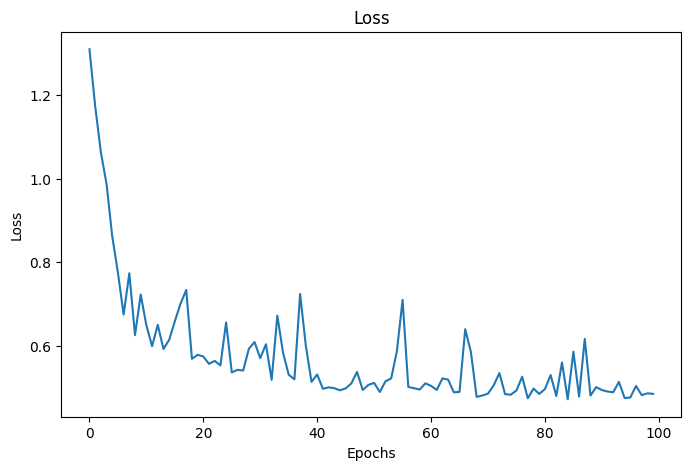

In [9]:
step = np.arange(0, num_epochs)

fig, ax = plt.subplots(figsize=(8, 5))

# Рисуем зависимость ошибки от эпохи обучения
plt.plot(step, np.array(loss_test))

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()